# Detector and Particle Measurement Resolution

<CENTER><img src="../../images/ATLASOD.gif" style="width:50%"></CENTER>

This notebook uses ATLAS Open Data https://opendata.atlas.cern to teach you the concepts of detector acceptance and efficiency!

ATLAS Open Data provides open access to proton-proton collision data at the LHC for educational purposes. ATLAS Open Data resources are ideal for high-school, undergraduate and postgraduate students.

Notebooks are web applications that allow you to create and share documents that can contain, for example:
1. live code
2. visualisations
3. narrative text

## Resolution

The **resolution** of a detector is its ability to distinguish between closely spaced details or signals. Depending on the type of detector, we may classify different types of resolution, such as *momentum*, *energy*, and *temporal*.

## Momentum Resolution

For a particle traveling in a uniform solenoidal magnetic field $B$ with radius of curvature $r$, the relative transverse momentum resolution is given approximately by

$$ \frac{dp_T}{p_T} = \frac{\sqrt{3}}{2} \sigma_x \frac{8p_T}{0.3BL^2}. $$

We can see from this relation that the resolution degrades linearly with $p_T$, but improves with a higher magnetic field and larger radius. 

## Energy Resolution

### Calorimeter Energy Resolution

A calorimeter is a detector that stops electrons, positrons, photons, and jets and measures the energy that was released as they stopped. They are also used in particle identification, as only certain particles will interact with certain calorimeters. [Practical Collider Physics, 6-7] These calorimeters include:

* Electromagnetic Calorimeters: Used to stop and measure the energies of electrons, positrons, and photons. As an electron enters the calorimeter, it radiates a bremsstrahlung photon which then produces an electron-positron pair. This process continues, and what results is an electromagnetic shower, such as the one shown in **Fig. 1**.

* Hadronic Calorimeters: Used to stop and measure the energies of jets produced by quarks and gluons. 

For more information, refer to [this page](https://cds.cern.ch/record/2759659/files/Calorimeters.pdf).

<div>
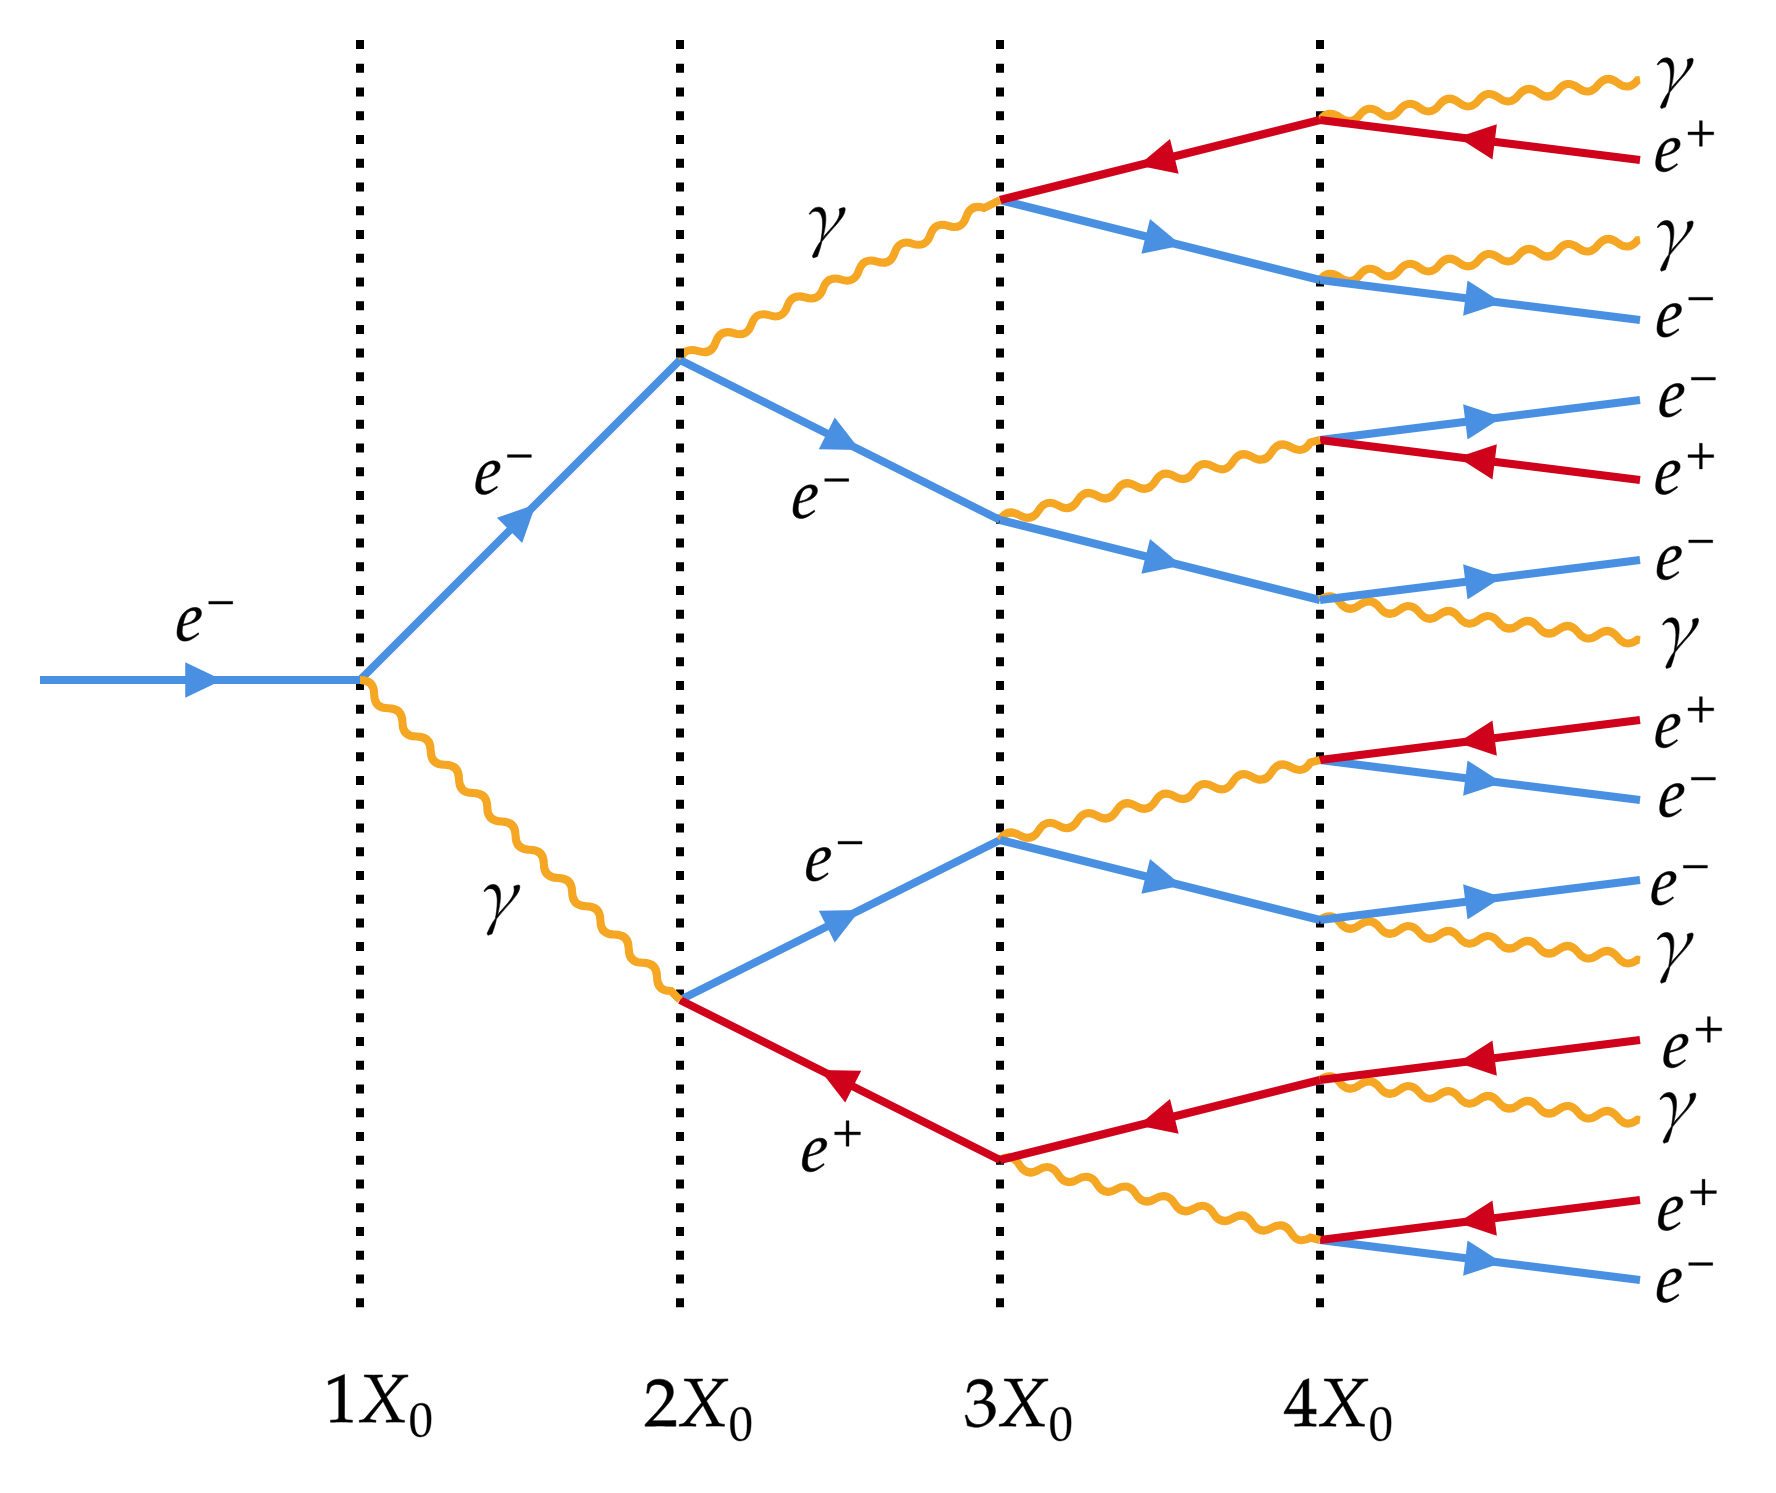
</div>

**Figure 1.** The development of an electromagnetic shower in an electromagnetic calorimeter. 

The energy resolution of a calorimeter, which sets the precision with which one can reconstruct particle four-vectors, is generally given by

$$ \frac{\sigma(E)}{E} = \frac{a}{\sqrt{E}} \oplus \frac{b}{E} \oplus c, $$

where $\oplus$ denotes addition in quadrature, and we have the following terms:

* The first term, with coefficient $a$, is the **stochastic** or **sampling term**. This takes into account fluctuations in the number of signal generating processes, such as the conversion of light into photo-electrons by a photo-device.

* The second term, with coefficient $b$, is the **noise term**. This takes into account the noise from readout electronics and pileup.

* The last term, with coefficient $c$, is the **constant term**. This takes into account imperfections in the calorimeter construction, non-uniformities of signal generation and/or collection, channel-to-channel intercalibration errors, and fluctuations in the amount of energy leakage.

For very high particle energies, the constant term is the most dominate. Therefore, in the limit of large $E$, good energy resolution can be achieved by having as small of a constant term as possible.

### Jet Energy Resolution

The **jet energy resolution** quantifies the number of fluctuations in the measurement of a reconstructed jet's energy. The resolution is limited by the following effects:

* The alogorithms used to define the jets

* The fluctuation in the particle content of jets

* The fluctuation in the event itself

* The fluctuation in energy pileup

* The magnetic field

The jet energy resolution can be carefully measured by studying the asymettry of di-jet events in the detector. 

The cone size of the jet must be optimized in order to obtain the best mass resolution. In defining the jet axis, the mass resolution due to the angular error $d\theta$ is given by

$$ \frac{dM}{M} = \frac{p_T}{M}d\theta. $$